<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/10_NLP_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Women's E-Commerce Clothing Reviews

---
Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


In [6]:
# from google.colab import files
# uploaded = files.upload()

## Preparation

In [7]:
import pandas as pd
# df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/main/data/Womens%20Clothing%20E-Commerce%20Reviews.csv')

In [8]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'clothing id', 'age', 'title', 'review text', 'rating',
       'recommended ind', 'positive feedback count', 'division name',
       'department name', 'class name'],
      dtype='object')

In [10]:
df.isnull().sum()

unnamed: 0                    0
clothing id                   0
age                           0
title                      3810
review text                 845
rating                        0
recommended ind               0
positive feedback count       0
division name                14
department name              14
class name                   14
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings')

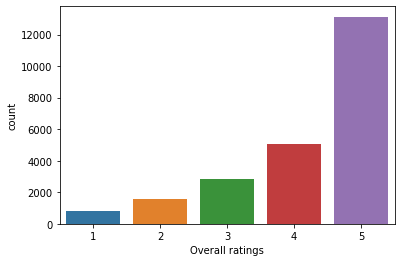

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.rating)
plt.xlabel('Overall ratings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Overall ratings category')

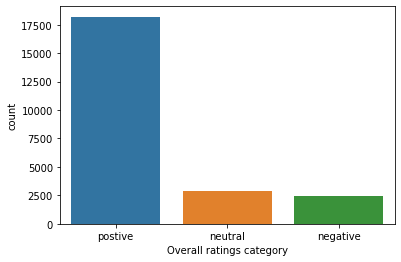

In [12]:
df['ratings_category'] = df.rating.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'postive',
    5:'postive'
})
sns.countplot(df.ratings_category)
plt.xlabel('Overall ratings category')

In [13]:
df.head()

,unnamed: 0,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name,ratings_category
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,postive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,postive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,postive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,postive


In [14]:
review_baru = pd.DataFrame(data=df['review text'])
review_baru.columns = ['review']
review_baru = review_baru.astype(str)
review_baru.head()

,review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [15]:
category = pd.get_dummies(df['ratings_category'])
df_baru = pd.concat([review_baru, category], axis = 1)
df_baru

,review,negative,neutral,postive
0,Absolutely wonderful - silky and sexy and comf...,0,0,1
1,Love this dress! it's sooo pretty. i happene...,0,0,1
2,I had such high hopes for this dress and reall...,0,1,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0,0,1
4,This shirt is very flattering to all due to th...,0,0,1
...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,0,0,1
23482,"It reminds me of maternity clothes. soft, stre...",0,1,0
23483,"This fit well, but the top was very see throug...",0,1,0
23484,I bought this dress for a wedding i have this ...,0,1,0


In [16]:
len(df_baru)

23486

In [17]:
df_baru[:2000]

,review,negative,neutral,postive
0,Absolutely wonderful - silky and sexy and comf...,0,0,1
1,Love this dress! it's sooo pretty. i happene...,0,0,1
2,I had such high hopes for this dress and reall...,0,1,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0,0,1
4,This shirt is very flattering to all due to th...,0,0,1
...,...,...,...,...
1995,Material is hard to wear a bra under it,1,0,0
1996,Very soft fabric. does begin to ball up due to...,0,0,1
1997,These jeans hug in all the right places. the h...,0,0,1
1998,Loved the way these felt but like the previous...,0,0,1


In [18]:
review = df_baru['review'].values
category = df_baru[['negative','neutral','postive']].values

## Rock n Roll

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (review, category, test_size = 0.2)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 5000, oov_token = 'x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)


In [21]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim = 16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9

In [23]:
num_epochs = 10
history = model.fit(
    padded_train,
    y_train,
    epochs = num_epochs,
    validation_data = (padded_test, y_test),
    verbose= 2
)

Epoch 1/10
588/588 - 43s - loss: 0.6829 - accuracy: 0.7617 - val_loss: 0.4841 - val_accuracy: 0.7782
Epoch 2/10
588/588 - 39s - loss: 0.5149 - accuracy: 0.7894 - val_loss: 0.4558 - val_accuracy: 0.8044
Epoch 3/10
588/588 - 39s - loss: 0.4566 - accuracy: 0.8011 - val_loss: 0.4639 - val_accuracy: 0.7999
Epoch 4/10
588/588 - 40s - loss: 0.4291 - accuracy: 0.8022 - val_loss: 0.4853 - val_accuracy: 0.8101
Epoch 5/10
588/588 - 40s - loss: 0.4098 - accuracy: 0.8130 - val_loss: 0.5097 - val_accuracy: 0.8084
Epoch 6/10
588/588 - 40s - loss: 0.3956 - accuracy: 0.8203 - val_loss: 0.4929 - val_accuracy: 0.8155
Epoch 7/10
588/588 - 40s - loss: 0.3729 - accuracy: 0.8263 - val_loss: 0.5276 - val_accuracy: 0.7976
Epoch 8/10
588/588 - 40s - loss: 0.3607 - accuracy: 0.8352 - val_loss: 0.5485 - val_accuracy: 0.8059
Epoch 9/10
588/588 - 40s - loss: 0.3477 - accuracy: 0.8400 - val_loss: 0.5786 - val_accuracy: 0.7654
Epoch 10/10
588/588 - 40s - loss: 0.3351 - accuracy: 0.8436 - val_loss: 0.7270 - val_accura

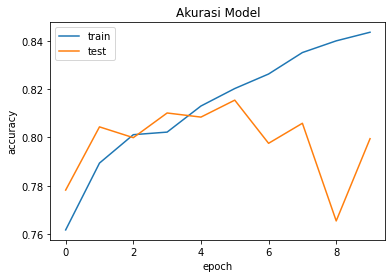

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

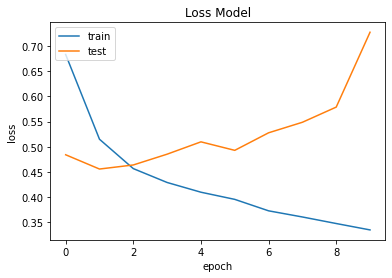

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()